In [ ]:
# Rodolph Khoury - 222199
# Elie Rhayem - 222555
# Romeo Moussa - 222538

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Normalization
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
fish_data = pd.read_csv('/content/Fish.csv')
dataset = fish_data.copy()

print(dataset.sample(10))
print()
print(dataset.isna().sum())

    Species  Weight  Length1  Length2  Length3   Height   Width
28    Bream   850.0     32.8     36.0     41.6  16.8896  6.1984
80    Perch    85.0     17.8     19.6     20.8   5.1376  3.0368
89    Perch   135.0     20.0     22.0     23.5   5.8750  3.5250
31    Bream   955.0     35.0     38.5     44.0  18.0840  6.2920
111   Perch   840.0     32.5     35.0     37.3  11.4884  7.7957
64   Parkki   120.0     17.5     19.0     21.3   8.3922  2.9181
87    Perch   120.0     20.0     22.0     23.5   5.6400  3.5250
108   Perch   320.0     27.8     30.0     31.6   7.6156  4.7716
112   Perch   685.0     34.0     36.5     39.0  10.8810  6.8640
23    Bream   680.0     31.8     35.0     40.6  15.4686  6.1306

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


In [ ]:
specie_encoder = LabelEncoder()
dataset["Species"] = specie_encoder.fit_transform(dataset["Species"])

print(dataset)

     Species  Weight  Length1  Length2  Length3   Height   Width
0          0   242.0     23.2     25.4     30.0  11.5200  4.0200
1          0   290.0     24.0     26.3     31.2  12.4800  4.3056
2          0   340.0     23.9     26.5     31.1  12.3778  4.6961
3          0   363.0     26.3     29.0     33.5  12.7300  4.4555
4          0   430.0     26.5     29.0     34.0  12.4440  5.1340
..       ...     ...      ...      ...      ...      ...     ...
154        5    12.2     11.5     12.2     13.4   2.0904  1.3936
155        5    13.4     11.7     12.4     13.5   2.4300  1.2690
156        5    12.2     12.1     13.0     13.8   2.2770  1.2558
157        5    19.7     13.2     14.3     15.2   2.8728  2.0672
158        5    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


In [ ]:
features = dataset.drop('Weight', axis=1)
labels = dataset['Weight']

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

normalizer = Normalization()
normalizer.adapt(np.array(train_features))

In [ ]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    model.compile(
        loss='mse',
        optimizer=optimizer,
        metrics=['mae', 'mse']
    )
    return model

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization)      │ (127, 6)                    │              13 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (56.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 13 (56.00 B)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    epochs=100,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 330132.4062 - mae: 414.5444 - mse: 330131.4375 - val_loss: 160058.7812 - val_mae: 300.8172 - val_mse: 160057.8125
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 328410.4688 - mae: 433.5856 - mse: 328409.5000 - val_loss: 159879.6250 - val_mae: 300.5511 - val_mse: 159878.6562
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 291990.7812 - mae: 401.8980 - mse: 291989.7812 - val_loss: 159696.5312 - val_mae: 300.2644 - val_mse: 159695.5625
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 289741.0312 - mae: 399.4481 - mse: 289740.0938 - val_loss: 159489.6406 - val_mae: 299.9424 - val_mse: 159488.6719
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 311215.4688 - mae: 421.7003 - mse: 311214.4688 - val_loss: 159257.0469 - val_mae: 299.5797 - val_mse: 159256.0469
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 307820.5625 - mae: 412.1961 - mse: 307819.5625 - val_loss: 158988.6562 - val_mae: 

In [ ]:
test_results = dnn_model.evaluate(test_features, test_labels, verbose=0)
print("Test Loss (MSE):", test_results[0])
print("Test MAE:", test_results[1])
print("Test MSE:", test_results[2])
print()

test_predictions = dnn_model.predict(test_features).flatten()

prediction_and_real = pd.DataFrame({
    'Prediction': test_predictions,
    'True Value': test_labels
})
print(prediction_and_real.head())

Test Loss (MSE): 8722.208984375
Test MAE: 76.71580505371094
Test MSE: 8717.5439453125

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
     Prediction  True Value
78    84.131638        78.0
155  107.906883        13.4
128  129.433578       200.0
55   147.396744       270.0
94    69.991737       150.0


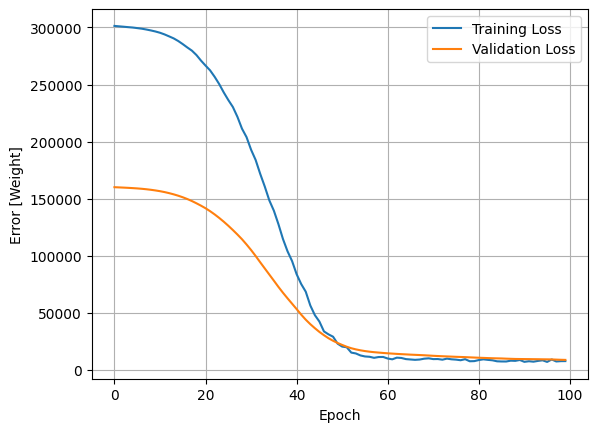

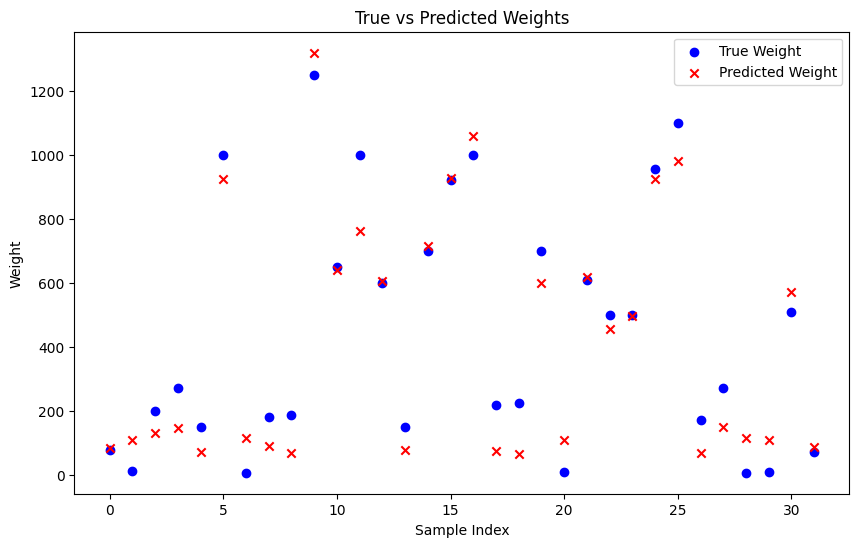

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [Weight]')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(history)
print()

indices = np.arange(len(test_labels))
plt.figure(figsize=(10, 6))
plt.scatter(indices, test_labels, marker='o', color='blue', label='True Weight')
plt.scatter(indices, test_predictions, marker='x', color='red', label='Predicted Weight')
plt.xlabel('Sample Index')
plt.ylabel('Weight')
plt.title('True vs Predicted Weights')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(test_labels, test_predictions)
print("R² Score:", r2)

R² Score: 0.9387121303011065
